# Objective Aggregation Using Different Clustering Techniques
- Author: Renan Santos
- Email: renansantosmendes@gmail.com

### Importing main libs

In [2]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

Automatically created module for IPython interactive environment


### Reading the data

In [16]:
data = pd.read_csv('new_solutions_r200.csv', encoding='utf-8', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,445752,2238,175,17,7544,602,3795,0.518717
1,433997,2762,202,14,7761,710,3987,0.454545
2,447071,3325,206,20,8533,629,3904,0.600000
3,418724,2392,157,18,7515,685,3803,0.515152
4,431008,2852,200,17,8375,735,3528,0.524064


- As can seen in the above cell this solutions has 8 objectives and every one corresponding to different functions
- Total of solutions:

In [17]:
print(data.shape[0],'solutions')

10001 solutions


### Data Normalization
- In order to apply some clustering algorithms, let's normalize the data

In [18]:
X = pd.DataFrame(data=MinMaxScaler().fit_transform(data))
X.columns = 'f1 f2 f3 f4 f5 f6 f7 f8'.split()
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8
0,0.503668,0.278508,0.557252,0.3750,0.331165,0.330579,0.634673,0.583414
1,0.412986,0.464654,0.763359,0.1875,0.389973,0.628099,0.749850,0.409836
2,0.513843,0.664654,0.793893,0.5625,0.599187,0.404959,0.700060,0.803279
3,0.295165,0.333215,0.419847,0.4375,0.323306,0.559229,0.639472,0.573770
4,0.389928,0.496625,0.748092,0.3750,0.556369,0.696970,0.474505,0.597878


### Correlations
- Let's annalyse the correlations between the functions

#### With Pearson Correlation

In [19]:
X.corr(method='pearson')

,f1,f2,f3,f4,f5,f6,f7,f8
f1,1.000000,0.131506,0.151561,0.504807,0.120460,-0.129560,-0.025700,0.312473
f2,0.131506,1.000000,0.101368,-0.054441,0.863524,0.095734,-0.220740,-0.198593
f3,0.151561,0.101368,1.000000,0.225540,0.060944,-0.013663,0.038562,0.224146
f4,0.504807,-0.054441,0.225540,1.000000,-0.118792,-0.185209,0.163125,0.865126
f5,0.120460,0.863524,0.060944,-0.118792,1.000000,0.041447,-0.667102,-0.317909
f6,-0.129560,0.095734,-0.013663,-0.185209,0.041447,1.000000,-0.115171,-0.132805
f7,-0.025700,-0.220740,0.038562,0.163125,-0.667102,-0.115171,1.000000,0.325167
f8,0.312473,-0.198593,0.224146,0.865126,-0.317909,-0.132805,0.325167,1.000000


#### With Spearman Correlation

In [43]:
X.corr(method='spearman')

,f1,f2,f3,f4,f5,f6,f7,f8
f1,1.000000,-0.106441,0.182909,0.518107,-0.136225,-0.140557,0.175544,0.465382
f2,-0.106441,1.000000,0.228954,-0.081498,0.833722,0.093069,-0.226326,-0.330994
f3,0.182909,0.228954,1.000000,0.290841,0.179736,-0.044047,0.016656,0.194289
f4,0.518107,-0.081498,0.290841,1.000000,-0.148713,-0.175475,0.305007,0.745634
f5,-0.136225,0.833722,0.179736,-0.148713,1.000000,0.091025,-0.566095,-0.495086
f6,-0.140557,0.093069,-0.044047,-0.175475,0.091025,1.000000,-0.068069,-0.180239
f7,0.175544,-0.226326,0.016656,0.305007,-0.566095,-0.068069,1.000000,0.486528
f8,0.465382,-0.330994,0.194289,0.745634,-0.495086,-0.180239,0.486528,1.000000


#### With Kendall Correlation

In [44]:
X.corr(method='kendall')

,f1,f2,f3,f4,f5,f6,f7,f8
f1,1.000000,-0.071399,0.123340,0.387986,-0.091216,-0.094897,0.117574,0.323962
f2,-0.071399,1.000000,0.156478,-0.058902,0.640729,0.062701,-0.153181,-0.226812
f3,0.123340,0.156478,1.000000,0.214615,0.122594,-0.029992,0.011094,0.132715
f4,0.387986,-0.058902,0.214615,1.000000,-0.107403,-0.127952,0.223002,0.598477
f5,-0.091216,0.640729,0.122594,-0.107403,1.000000,0.061333,-0.400652,-0.345506
f6,-0.094897,0.062701,-0.029992,-0.127952,0.061333,1.000000,-0.045873,-0.123123
f7,0.117574,-0.153181,0.011094,0.223002,-0.400652,-0.045873,1.000000,0.340235
f8,0.323962,-0.226812,0.132715,0.598477,-0.345506,-0.123123,0.340235,1.000000


### Kurtosis

In [20]:
X.kurt()

f1   -0.001174
f2    0.024674
f3    2.266205
f4    0.022048
f5    0.008688
f6   -0.049333
f7   -0.046380
f8    0.330444
dtype: float64

### Skewness

In [21]:
X.skew()

f1   -0.022432
f2    0.148386
f3   -0.893327
f4    0.183826
f5    0.068739
f6    0.015760
f7   -0.125309
f8   -0.485958
dtype: float64

## Plotting the Data

### Pairplot

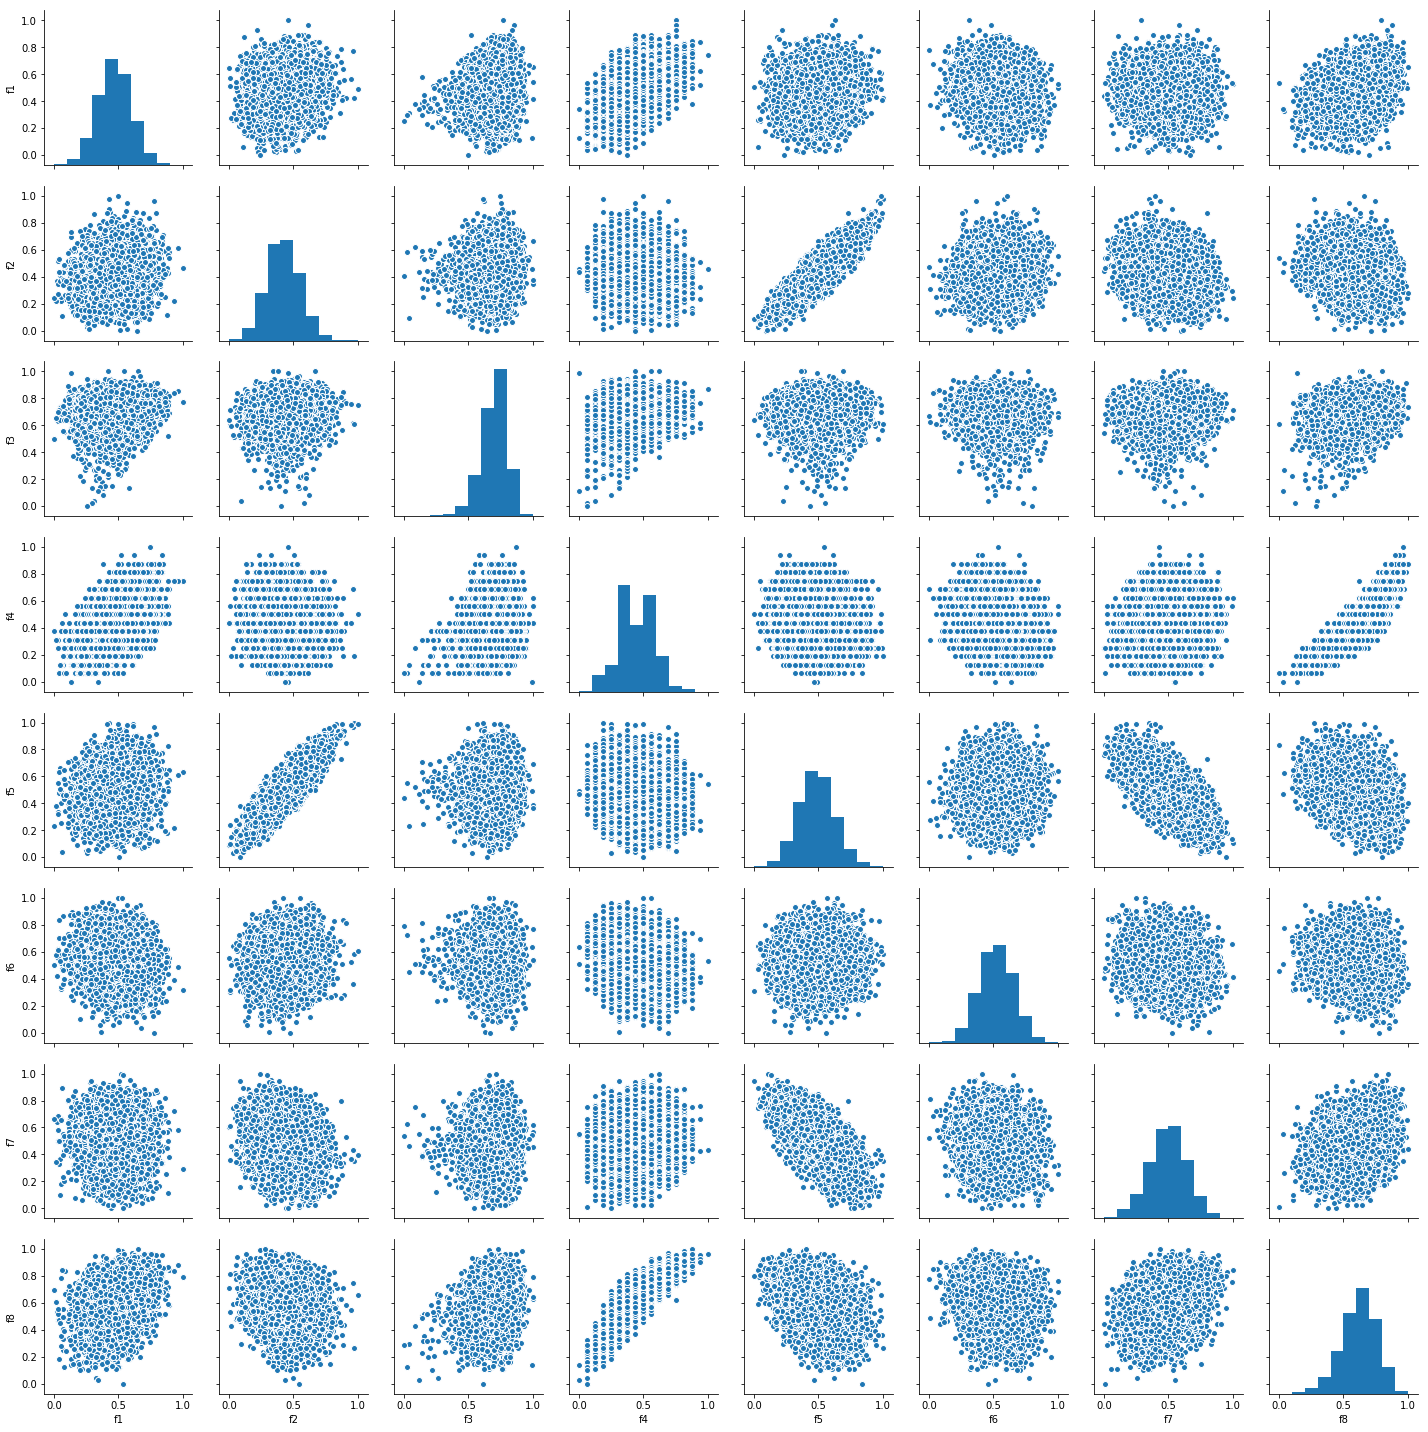

In [22]:
sns.pairplot(X)

### Boxplot of the data

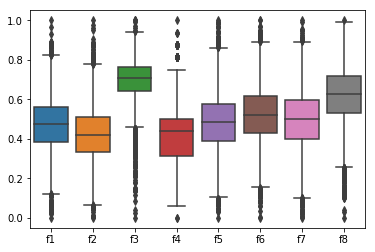

In [23]:
sns.boxplot(data = X, orient = "v")

# Clustering the Data

In [46]:
from sklearn.cluster import KMeans,DBSCAN,AffinityPropagation
from sklearn.cluster import AgglomerativeClustering,SpectralClustering

## KMeans

In [57]:
n = 4
kmeans = KMeans(init='k-means++', n_clusters=n, n_init=10)
kmeans.fit(X.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
kmeans.labels_

array([2, 0, 1, 2, 0, 3, 2, 1], dtype=int32)

## DBSCAN

In [34]:
db = DBSCAN(eps=15,min_samples=2).fit(X.T)
db.labels_

array([ 0,  1, -1,  0,  1, -1, -1, -1])

In [ ]:
# for 50 requests  -> array([-1,  0,  1, -1,  0, -1, -1,  1])
# for 200 requests -> array([ 0,  1, -1,  0,  1, -1, -1, -1])